In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [3]:
train = train.sample(30000,random_state=2)
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [4]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [5]:
train.dropna(inplace=True)

In [6]:
train.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [7]:
train.duplicated().sum()

0

In [8]:
train['is_duplicate'].value_counts()

is_duplicate
0    19013
1    10987
Name: count, dtype: int64

In [9]:
train.shape

(30000, 6)

In [10]:
train['question1'].nunique()

28334

In [11]:
train['question2'].nunique()

28356

In [12]:
x = train['question1'].value_counts() > 1
x[x].shape

(1345,)

C:\Users\Ameena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


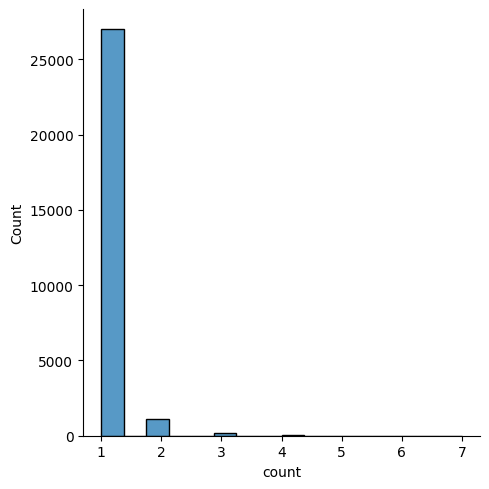

In [13]:
sns.displot(train['question1'].value_counts())

In [14]:
x = train['question2'].value_counts() > 1
x[x].shape

(1273,)

C:\Users\Ameena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


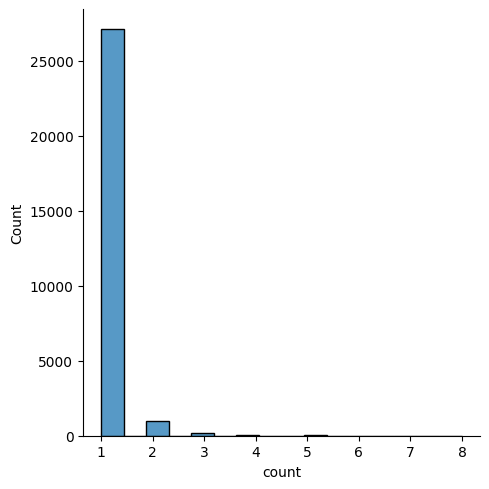

In [15]:
sns.displot(train['question2'].value_counts())

C:\Users\Ameena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


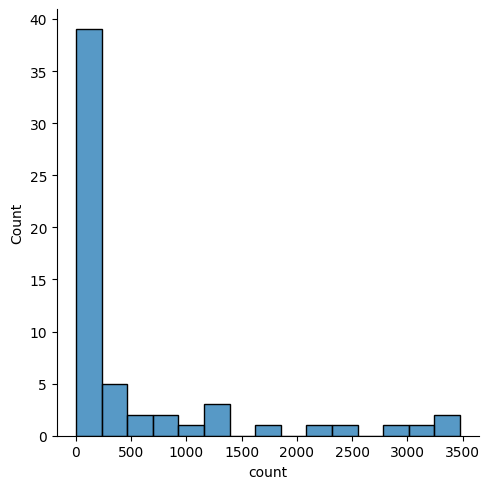

In [16]:
x = train['question1'].apply(lambda x: len(x.split())).value_counts()
sns.displot(x)

C:\Users\Ameena\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


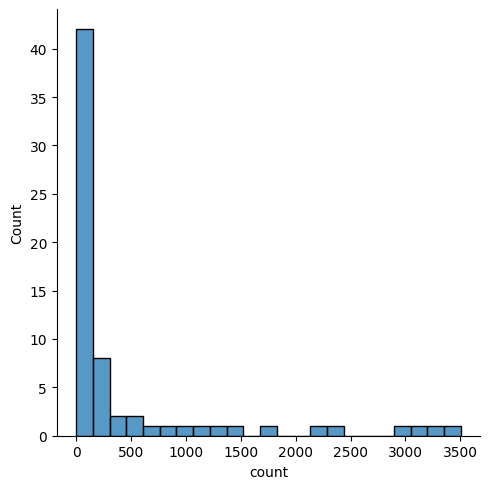

In [17]:
x = train['question2'].apply(lambda x: len(x.split())).value_counts()
sns.displot(x)

In [18]:
train.shape

(30000, 6)

In [19]:
x = (train['question1'].apply(lambda x: len(x.split()) == 1))
len(x[x])

3

In [20]:
train[x]

,id,qid1,qid2,question1,question2,is_duplicate
216861,216861,323090,17986,Aaas,My dad always yells at me and causes me anxiet...,0
23884,23884,44699,44700,HH,What is hh?,0
44619,44619,80055,80056,Na,How do I activate Reliance Jio 4G?,0


In [21]:
ques1_ids = train[x].qid1
ques1_ids

216861    323090
23884      44699
44619      80055
Name: qid1, dtype: int64

In [22]:
train.shape

(30000, 6)

In [23]:
train = train[~train['qid1'].isin(ques1_ids)]

In [24]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [25]:
train.shape

(29997, 6)

In [26]:
y = (train['question2'].apply(lambda x: len(x.split()) == 1))
len(y[y])

2

In [27]:
ques2_ids = train[y].qid2

In [28]:
train = train[~train['qid2'].isin(ques2_ids)]
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [29]:
train.shape

(29995, 6)

In [30]:
train[train['qid1'].isin(ques1_ids)]

,id,qid1,qid2,question1,question2,is_duplicate


In [31]:
train[train['qid2'].isin(ques2_ids)]

,id,qid1,qid2,question1,question2,is_duplicate


In [32]:
train.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [33]:
(train['question1'] + " " + train['question2']).iloc[0]

'What is the best marketing automation tool for small and mid-size companies? What is the best marketing automation tool for small and mid-sized companies?'

In [34]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download necessary NLTK datasets
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Initialize the necessary tools
    stop_words = set(stopwords.words('english'))  # Stop words
    stemmer = PorterStemmer()  # Stemming

    # Tokenize the text (split into words)
    words = nltk.word_tokenize(text)

    # Remove stop words, punctuation (using regex), and apply stemming
    processed_words = [
        stemmer.stem(word)  # Apply stemming
        for word in words  # For each word in the tokenized text
        if word.lower() not in stop_words  # Remove stop words
        and re.match(r'^[A-Za-z]+$', word)  # Remove punctuation using regex
    ]
    
    # Join the processed words back into a single string
    processed_text = ' '.join(processed_words)
    
    return processed_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ameena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ameena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
from tqdm import tqdm

tqdm.pandas()  # This activates the progress_apply functionality
train['question1'] = train['question1'].progress_apply(preprocess_text)

100%|██████████████████████████████████████████████████████████████████████████| 29995/29995 [00:26<00:00, 1138.39it/s]


In [36]:
train['question2'] = train['question2'].progress_apply(preprocess_text)

100%|██████████████████████████████████████████████████████████████████████████| 29995/29995 [00:25<00:00, 1163.05it/s]


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features = 2000)
vectorizer.fit((train['question1'] + " " + train['question2']))

TfidfVectorizer(max_features=2000, stop_words='english')

In [38]:
a = vectorizer.transform(train['question1']).toarray()
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
a.shape

(29995, 2000)

In [40]:
b = vectorizer.transform(train['question2']).toarray()
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
temp_df1 = pd.DataFrame(a, index= train.index)

In [42]:
temp_df1.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
398782,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0.0,0.0,0.0,0.419509,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
temp_df2 = pd.DataFrame(b, index= train.index)
temp_df2.head(3)

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
398782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(29995, 4000)

final_df = pd.concat([train, temp_df], axis=1)
print(final_df.shape)
final_df.head()

In [46]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
398782,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
115086,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
327711,0.0,0.0,0.0,0.419509,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
367788,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.329307,0.0,0.0,0.0,0.0
151235,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [47]:
y = train['is_duplicate'].values
y.shape

(29995,)

In [48]:
#temp_df.to_csv('df.csv')
#y.to_csv('target.csv')

#### Simple Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(temp_df, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(23996, 4000)
(5999, 4000)


In [104]:
def train_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return model

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform
def tune_model_lr(model):
    param_grid = {
    'C': loguniform(1e-4, 1e2),  # Regularization strength, sampled from a log-uniform distribution
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers
    'max_iter': [100, 200, 300],  # Maximum iterations
    'tol': uniform(1e-4, 1e-2),  # Tolerance for stopping criteria, sampled uniformly 
       }
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    return grid_search

In [110]:
lr = LogisticRegression()
lr = train_model(lr)

C:\Users\Ameena\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7007834639106518
[[3232  540]
 [1255  972]]


In [140]:
rf = RandomForestClassifier()
train_model(rf)

0.7259543257209535
[[3230  542]
 [1102 1125]]


In [148]:
x_train.shape

(23996, 4000)

In [150]:
y_train.shape

(23996,)

In [154]:
xg = XGBClassifier()
xg.fit(x_train.values, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [160]:
pred = xg.predict(x_test.values)
print(accuracy_score(y_test, pred))
confusion_matrix(y_test, pred)

0.7097849641606935


array([[3476,  296],
       [1445,  782]], dtype=int64)

In [192]:
from transformers import TFBertForSequenceClassification, BertTokenizer

model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [194]:
question_1 = "What are the best programming languages?"
question_2 = "Which programming languages should I learn?"
inputs = tokenizer(question_1, question_2, return_tensors='pt', padding=True, truncation=True, max_length=512)

ImportError: Unable to convert output to PyTorch tensors format, PyTorch is not installed.